# Part 4 - Modeling

In [1]:
# Load packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset

df = pd.read_csv('Part_3.csv')
pd.set_option("display.max_columns", None)
display(df.head())

loan_status  loan_amnt  term  int_rate  installment  emp_length  \
0            1     5000.0    36     10.65       162.87        10.0   
1            0     2500.0    60     15.27        59.83         0.0   
2            1     2400.0    36     15.96        84.33        10.0   
3            1    10000.0    36     13.49       339.31        10.0   
4            1     3000.0    60     12.69        67.79         1.0   

   annual_inc    dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  \
0     24000.0  27.65          0.0             1.0       3.0      0.0   
1     30000.0   1.00          0.0             5.0       3.0      0.0   
2     12252.0   8.72          0.0             2.0       2.0      0.0   
3     49200.0  20.00          0.0             1.0      10.0      0.0   
4     80000.0  17.94          0.0             0.0      15.0      0.0   

   revol_bal  revol_util  total_acc  pub_rec_bankruptcies  fico_score  \
0    13648.0        83.7       76.0                   0.0         737   
1     1687.0         9.4       76.0                   0.0         742   
2     2956.0        98.5       76.0                   0.0         737   
3     5598.0        21.0       76.0                   0.0         692   
4    27783.0        53.9       76.0                   0.0         697   

   fico_class  sub_grade_A1  sub_grade_A2  sub_grade_A3  sub_grade_A4  \
0           3             0             0             0             0   
1           4             0             0             0             0   
2           3             0             0             0             0   
3           3             0             0             0             0   
4           3             0             0             0             0   

   sub_grade_A5  sub_grade_B1  sub_grade_B2  sub_grade_B3  sub_grade_B4  \
0             0             0             1             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade_B5  sub_grade_C1  sub_grade_C2  sub_grade_C3  sub_grade_C4  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             1             0             0             0   
4             1             0             0             0             0   

   sub_grade_C5  sub_grade_D1  sub_grade_D2  sub_grade_D3  sub_grade_D4  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             1             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade_D5  sub_grade_E1  sub_grade_E2  sub_grade_E3  sub_grade_E4  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade_E5  sub_grade_F1  sub_grade_F2  sub_grade_F3  sub_grade_F4  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade_F5 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Columns: 130 entries, loan_status to addr_state_WY
dtypes: float64(14), int64(116)
memory usage: 39.5 MB


In [4]:
# Checking nulls

round(100 * (df.isnull().sum() / len(df.index)), 2).value_counts()

0.0    130
dtype: int64

In [5]:
print(df.columns.tolist())

['loan_status', 'loan_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'fico_score', 'fico_class', 'sub_grade_A1', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'verif_stat', 'purpose_car', 'purpose_credit_card', 'purpose_debt_consolid

In [6]:
df.shape

(39786, 130)

In [7]:
# Copy of the Data Frame

df_copy = df

## Training models

### Data splitting and standardization

In [8]:
df.loan_status.value_counts()

1    34116
0     5670
Name: loan_status, dtype: int64

In [9]:
# Checking the percentage of Charged off loans (loan_status = 0)

(df.loan_status == 0).sum() / len(df.loan_status) * 100

14.251244156235861

In [10]:
# Loading train_test_split

from sklearn.model_selection import train_test_split

In [11]:
# Spliting data into X and y and checking the shape

X = df.drop('loan_status', axis=1)
y = df['loan_status'].values

print(X.shape)
print(y.shape)

(39786, 129)
(39786,)


In [12]:
# Data splitting into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
# Checking the size of the data split

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(27850, 129)
(11936, 129)
(27850,)
(11936,)


In [14]:
# Checking the percentage of Charged off loans (loan status = 0) in the train and test sets

ratio_train = (y_train == 0).sum() / len(y_train) * 100
ratio_test = (y_test == 0).sum() / len(y_test) * 100
print("Percentage of the Charged off loans in the training set: ", ratio_train)
print("Percentage of the Charged off loans in the testing set: ", ratio_test)

Percentage of the Charged off loans in the training set:  14.287253141831238
Percentage of the Charged off loans in the testing set:  14.167225201072387


The data is not balanced in the target. The SMOTE method will be implemented.

In [15]:
# Importing SMOTE to balance the data

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [16]:
# Checking the data after the SMOTE method

print(X_resampled.shape)
print(y_resampled.shape)

(47742, 129)
(47742,)


In [17]:
# Proportion of repaid and outstanding loans in y_resampled

ratio_res = (y_resampled == 0).sum() / len(y_resampled) * 100
print("Percentage of the Charged off loans in the resampled set: ", ratio_res)

Percentage of the Charged off loans in the resampled set:  50.0


In [18]:
np.unique(y_resampled, return_counts=True)

(array([0, 1], dtype=int64), array([23871, 23871], dtype=int64))

In [19]:
# Data standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_resampled)
X_scaled_train = scaler.transform(X_resampled)
X_scaled_test = scaler.transform(X_test)

In [20]:
print("First row of X_scaled_train: \n", X_scaled_train[0])
print()
print("First row of X_scaled_test: \n", X_scaled_test[0])

First row of X_scaled_train: 
 [-8.62601338e-01 -7.59007117e-01 -1.36002600e+00 -8.32447770e-01
  5.99288766e-01 -2.02562809e-01  1.11229990e-01 -3.35729711e-01
 -9.28012868e-01 -5.42268446e-01 -2.84100100e-01 -6.44165359e-01
  3.38986771e-01  1.87042255e-01 -2.55951239e-01  1.56683625e-01
 -7.74534532e-02 -1.28203054e-01 -1.50396811e-01 -1.66645138e-01
  4.69602295e+00 -2.07019668e-01 -1.69216485e-01 -1.78924586e-01
 -2.14232765e-01 -1.98908289e-01 -2.08281878e-01 -1.86273967e-01
 -1.78362748e-01 -1.55841695e-01 -1.39004786e-01 -1.35680123e-01
 -1.19394562e-01 -1.46416327e-01 -1.36478512e-01 -1.23741592e-01
 -1.18851983e-01 -1.05952629e-01 -1.00565429e-01 -9.28417843e-02
 -8.34281920e-02 -8.01846637e-02 -7.12290488e-02 -6.06549352e-02
 -5.24544088e-02 -5.26547888e-02 -4.46523193e-02 -3.99302879e-02
 -3.48760794e-02 -2.78495968e-02 -3.00247632e-02 -2.09775555e-02
 -7.28479863e-01 -6.47252580e-03 -3.63501917e-02 -2.23378024e-01
  1.25176364e+00  2.30208007e-01 -1.55205963e-01  3.4107918

In [21]:
# Importing metrics and classification report

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [22]:
# Function using to create a classification reports

def evaluate(prediction, y_test): 
    result = classification_report(y_test, prediction, output_dict=True, zero_division=1)
    f1 = result['0']['f1-score'] # F1 score for Charged off loans
    accuracy = result['accuracy']
    performance_data= {'f1-score':round(f1, 2),
                      'accuracy':round(accuracy, 2)}
    return performance_data

It is very important to identify borrowers who may default on their loans. Therefore, the evaluation report will focus on the F1 result related to unpaid liabilities (Charged off, loan_status = 0).

### Decision Tree

In [23]:
# Importing the model

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

# Fitting the model

dtree.fit(X_scaled_train, y_resampled)

DecisionTreeClassifier()

In [24]:
# Prediction

dtree_prediction = dtree.predict(X_scaled_test)

In [25]:
# Results in the form of a classification report

print(classification_report(y_test, dtree_prediction, zero_division=1))

dtree_pr= evaluate(dtree_prediction, y_test)
dtree_pr

              precision    recall  f1-score   support

           0       0.20      0.24      0.22      1691
           1       0.87      0.84      0.86     10245

    accuracy                           0.76     11936
   macro avg       0.54      0.54      0.54     11936
weighted avg       0.78      0.76      0.77     11936



{'f1-score': 0.22, 'accuracy': 0.76}

In [26]:
# Confusion matrix

confusion_matrix(y_test, dtree_prediction)

array([[ 405, 1286],
       [1615, 8630]], dtype=int64)

### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_scaled_train, y_resampled)

RandomForestClassifier()

In [28]:
rf_prediction = rf.predict(X_scaled_test)

In [29]:
print(classification_report(y_test, rf_prediction, zero_division=1))
rf_pr = evaluate(rf_prediction, y_test)
print(rf_pr)

              precision    recall  f1-score   support

           0       0.37      0.03      0.06      1691
           1       0.86      0.99      0.92     10245

    accuracy                           0.85     11936
   macro avg       0.62      0.51      0.49     11936
weighted avg       0.79      0.85      0.80     11936

{'f1-score': 0.06, 'accuracy': 0.85}


In [30]:
confusion_matrix(y_test, rf_prediction)

array([[   58,  1633],
       [   99, 10146]], dtype=int64)

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_scaled_train, y_resampled)

C:\Users\barte\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [32]:
lr_prediction = lr.predict(X_scaled_test)

In [33]:
print(classification_report(y_test, lr_prediction, zero_division=1))
lr_pr = evaluate(lr_prediction, y_test)
print(lr_pr)

              precision    recall  f1-score   support

           0       0.55      0.02      0.03      1691
           1       0.86      1.00      0.92     10245

    accuracy                           0.86     11936
   macro avg       0.70      0.51      0.48     11936
weighted avg       0.82      0.86      0.80     11936

{'f1-score': 0.03, 'accuracy': 0.86}


In [34]:
confusion_matrix(y_test, lr_prediction)

array([[   30,  1661],
       [   25, 10220]], dtype=int64)

### Naïve Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_scaled_train, y_resampled)

GaussianNB()

In [36]:
nb_prediction = nb.predict(X_scaled_test)

In [37]:
print(classification_report(y_test, nb_prediction, zero_division=1))
nb_pr = evaluate(nb_prediction, y_test)
print(nb_pr)

              precision    recall  f1-score   support

           0       0.16      0.47      0.24      1691
           1       0.87      0.60      0.71     10245

    accuracy                           0.58     11936
   macro avg       0.52      0.54      0.48     11936
weighted avg       0.77      0.58      0.65     11936

{'f1-score': 0.24, 'accuracy': 0.58}


In [38]:
confusion_matrix(y_test, nb_prediction)

array([[ 802,  889],
       [4092, 6153]], dtype=int64)

### K-Nearest Neighbors (KNN)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [40]:
knn.fit(X_scaled_train, y_resampled)

KNeighborsClassifier()

In [41]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [42]:
knn_prediction = knn.predict(X_scaled_test)

In [43]:
print(classification_report(knn_prediction, y_test, zero_division=1))
knn_pr = evaluate(knn_prediction, y_test)
knn_pr

              precision    recall  f1-score   support

           0       0.10      0.24      0.14       688
           1       0.95      0.86      0.90     11248

    accuracy                           0.83     11936
   macro avg       0.52      0.55      0.52     11936
weighted avg       0.90      0.83      0.86     11936



{'f1-score': 0.14, 'accuracy': 0.83}

In [44]:
confusion_matrix(y_test, knn_prediction)

array([[ 168, 1523],
       [ 520, 9725]], dtype=int64)

### Multi Layer Perceptron Classifier (MLP)

In [45]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)

In [46]:
mlp.fit(X_scaled_train, y_resampled)

C:\Users\barte\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [47]:
mlp_prediction = mlp.predict(X_scaled_test)

In [48]:
print(classification_report(mlp_prediction, y_test, zero_division=1))
mlp_pr = evaluate(mlp_prediction, y_test)
mlp_pr

              precision    recall  f1-score   support

           0       0.21      0.23      0.22      1566
           1       0.88      0.87      0.88     10370

    accuracy                           0.79     11936
   macro avg       0.55      0.55      0.55     11936
weighted avg       0.79      0.79      0.79     11936



{'f1-score': 0.22, 'accuracy': 0.79}

In [49]:
confusion_matrix(y_test, mlp_prediction)

array([[ 356, 1335],
       [1210, 9035]], dtype=int64)

### Extreme Gradient Boosting Classifier (XGB)

In [50]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)

In [51]:
xgb.fit(X_scaled_train, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [52]:
xgb_prediction = xgb.predict(X_scaled_test)

In [53]:
print(classification_report(xgb_prediction, y_test, zero_division=1))
xgb_pr = evaluate(xgb_prediction, y_test)
xgb_pr

              precision    recall  f1-score   support

           0       0.05      0.28      0.09       323
           1       0.98      0.86      0.92     11613

    accuracy                           0.85     11936
   macro avg       0.52      0.57      0.50     11936
weighted avg       0.95      0.85      0.89     11936



{'f1-score': 0.09, 'accuracy': 0.85}

In [54]:
confusion_matrix(y_test, xgb_prediction)

array([[   91,  1600],
       [  232, 10013]], dtype=int64)

In [55]:
# DataFrame with accuracy and F1 scores of all models used

prediction_data={'Model': ['Decision Tree',
                          'Random Forest',
                          'Logistic Regression',
                          'Naive Bayes',
                          'KNN',
                          'MLP',
                          'XGB'
                         ],
                 
                  'F1-score': [dtree_pr['f1-score'],
                              rf_pr['f1-score'],
                              lr_pr['f1-score'],
                              nb_pr['f1-score'],
                              knn_pr['f1-score'],
                              mlp_pr['f1-score'],
                              xgb_pr['f1-score']
                         ],
                 
                  'Accuracy': [dtree_pr['accuracy'],
                              rf_pr['accuracy'],
                              lr_pr['accuracy'],
                              nb_pr['accuracy'],
                              knn_pr['accuracy'],
                              mlp_pr['accuracy'],
                              xgb_pr['accuracy']
                         ],
                 
                    }
 
# Create DataFrame
prediction_table = pd.DataFrame(prediction_data)
prediction_table.style.hide(axis='index')

The three models: Random Forest, Logistic Regression and XGB have high accuracy and very low f1_score. The answers are unbalanced (only a few negative answers (0) for Random Forest and Logistic Regression). This means that these models predict that most borrowers will repay their loans (loan_status = 1). This is due to the significant advantage of borrowers who have repaid their liabilities. Prediction of the KNN algorithm shows also high accuracy and moderately good f1_score. The models: Decision Tree, MLP and Naive Bayes are characterized by better balanced data and better f1_score for Charged off loans (best f1_score for Naive Bayes algorithm). Decision Tree and MLP show better accuracy. The accuracy for Naive Bayes is noticeably lower. According to all model scores the MLP algorithm seems to be the best (best balance between f1_score and accuracy). 

## Data compression by PCA

In [56]:
# Importing PCA

from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# Fitting the PCA

pca.fit_transform(X_scaled_train)

array([[-1.68398409e+00, -1.44855949e+00,  1.28090924e+00, ...,
        -3.85237213e-03,  1.19659109e-02,  4.26410282e-02],
       [-1.05818262e+00, -1.25776085e+00, -1.51927496e+00, ...,
        -4.89468397e-02, -1.00057421e-02,  1.26062829e-01],
       [ 1.27019319e+00,  1.85234210e+00, -3.12363487e+00, ...,
        -3.72718751e-02, -3.41549864e-02, -1.08264112e-01],
       ...,
       [ 5.24404710e-01, -2.87481808e+00,  4.78764379e-02, ...,
        -3.40910387e-01,  1.92252021e-02,  1.08612210e-01],
       [ 2.91060127e-03,  7.94094193e-01,  1.42901205e+00, ...,
         2.90994648e-01, -1.09148470e-01, -8.62545107e-02],
       [ 3.02125833e+00,  4.34818482e-01, -1.11317160e+00, ...,
        -1.84531769e-01,  1.23580601e-01, -2.06120515e-01]])

In [57]:
# Principal axes in feature space

pca.components_[0]

array([ 2.54401069e-01,  2.30490407e-01,  4.20561552e-01,  2.39688656e-01,
        7.11830627e-02,  1.01150214e-01,  1.49058108e-01,  5.86769790e-02,
        4.32246194e-02,  1.09074072e-01,  7.65797604e-02,  1.74343373e-01,
        2.93408247e-01,  9.47752422e-02,  7.52613976e-02, -3.22736088e-01,
       -2.99984255e-01, -1.32288226e-01, -1.40526274e-01, -1.37293490e-01,
       -1.37840629e-01, -1.12292530e-01, -6.86130544e-02, -5.73339820e-02,
       -4.66898599e-02, -2.97092885e-02, -1.68527142e-02,  2.10439032e-04,
        8.46677236e-03,  8.10145467e-03,  1.48871790e-02,  2.25996305e-02,
        2.27254071e-02,  4.28918504e-02,  4.63845853e-02,  4.69183188e-02,
        5.15710639e-02,  5.17720122e-02,  5.58566733e-02,  5.58576379e-02,
        5.93696327e-02,  5.80668207e-02,  5.62655129e-02,  4.58010085e-02,
        4.45584168e-02,  4.86321574e-02,  4.60928963e-02,  3.94627235e-02,
        3.65948466e-02,  3.20462370e-02,  3.34503194e-02,  2.23607545e-02,
        8.06467556e-04, -

In [58]:
# Percentage of variance explained by each of the selected components.

pca.explained_variance_ratio_

array([0.03128691, 0.02729375, 0.02538918, 0.0155255 , 0.01409422,
       0.01291181, 0.01162694, 0.01082567, 0.01051821, 0.00963285,
       0.00931981, 0.00893177, 0.00877373, 0.00868553, 0.0086149 ,
       0.00858543, 0.00851191, 0.00849756, 0.00846362, 0.00843881,
       0.00841081, 0.0083706 , 0.00836269, 0.00834874, 0.00831528,
       0.00829838, 0.00829145, 0.00828703, 0.00825251, 0.00824832,
       0.00821966, 0.00819031, 0.00817934, 0.00816077, 0.00815001,
       0.00813479, 0.00810543, 0.00809581, 0.00807571, 0.00807448,
       0.00805623, 0.00803173, 0.00801613, 0.00800849, 0.007994  ,
       0.00798498, 0.00797411, 0.00796382, 0.00794805, 0.00792591,
       0.00792334, 0.00791017, 0.00789453, 0.00789197, 0.00788311,
       0.00787141, 0.00785543, 0.00784275, 0.00783196, 0.00782005,
       0.0078159 , 0.0078121 , 0.00780035, 0.00778512, 0.00777169,
       0.00776603, 0.00775259, 0.00774337, 0.00773503, 0.0077112 ,
       0.00770714, 0.00769941, 0.00769066, 0.00768674, 0.00767

In [59]:
# Cumulative sum of elements

var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.03128691, 0.05858066, 0.08396984, 0.09949534, 0.11358956,
       0.12650136, 0.1381283 , 0.14895398, 0.15947219, 0.16910503,
       0.17842484, 0.18735661, 0.19613034, 0.20481587, 0.21343077,
       0.2220162 , 0.23052811, 0.23902567, 0.24748928, 0.2559281 ,
       0.26433891, 0.27270951, 0.2810722 , 0.28942093, 0.29773621,
       0.30603459, 0.31432604, 0.32261307, 0.33086558, 0.3391139 ,
       0.34733356, 0.35552387, 0.36370321, 0.37186398, 0.38001399,
       0.38814878, 0.39625421, 0.40435003, 0.41242574, 0.42050022,
       0.42855644, 0.43658817, 0.4446043 , 0.45261279, 0.46060679,
       0.46859177, 0.47656587, 0.48452969, 0.49247774, 0.50040365,
       0.50832699, 0.51623716, 0.52413169, 0.53202366, 0.53990677,
       0.54777817, 0.55563361, 0.56347636, 0.57130832, 0.57912836,
       0.58694426, 0.59475636, 0.60255671, 0.61034183, 0.61811351,
       0.62587954, 0.63363213, 0.6413755 , 0.64911053, 0.65682173,
       0.66452887, 0.67222829, 0.67991895, 0.68760569, 0.69528

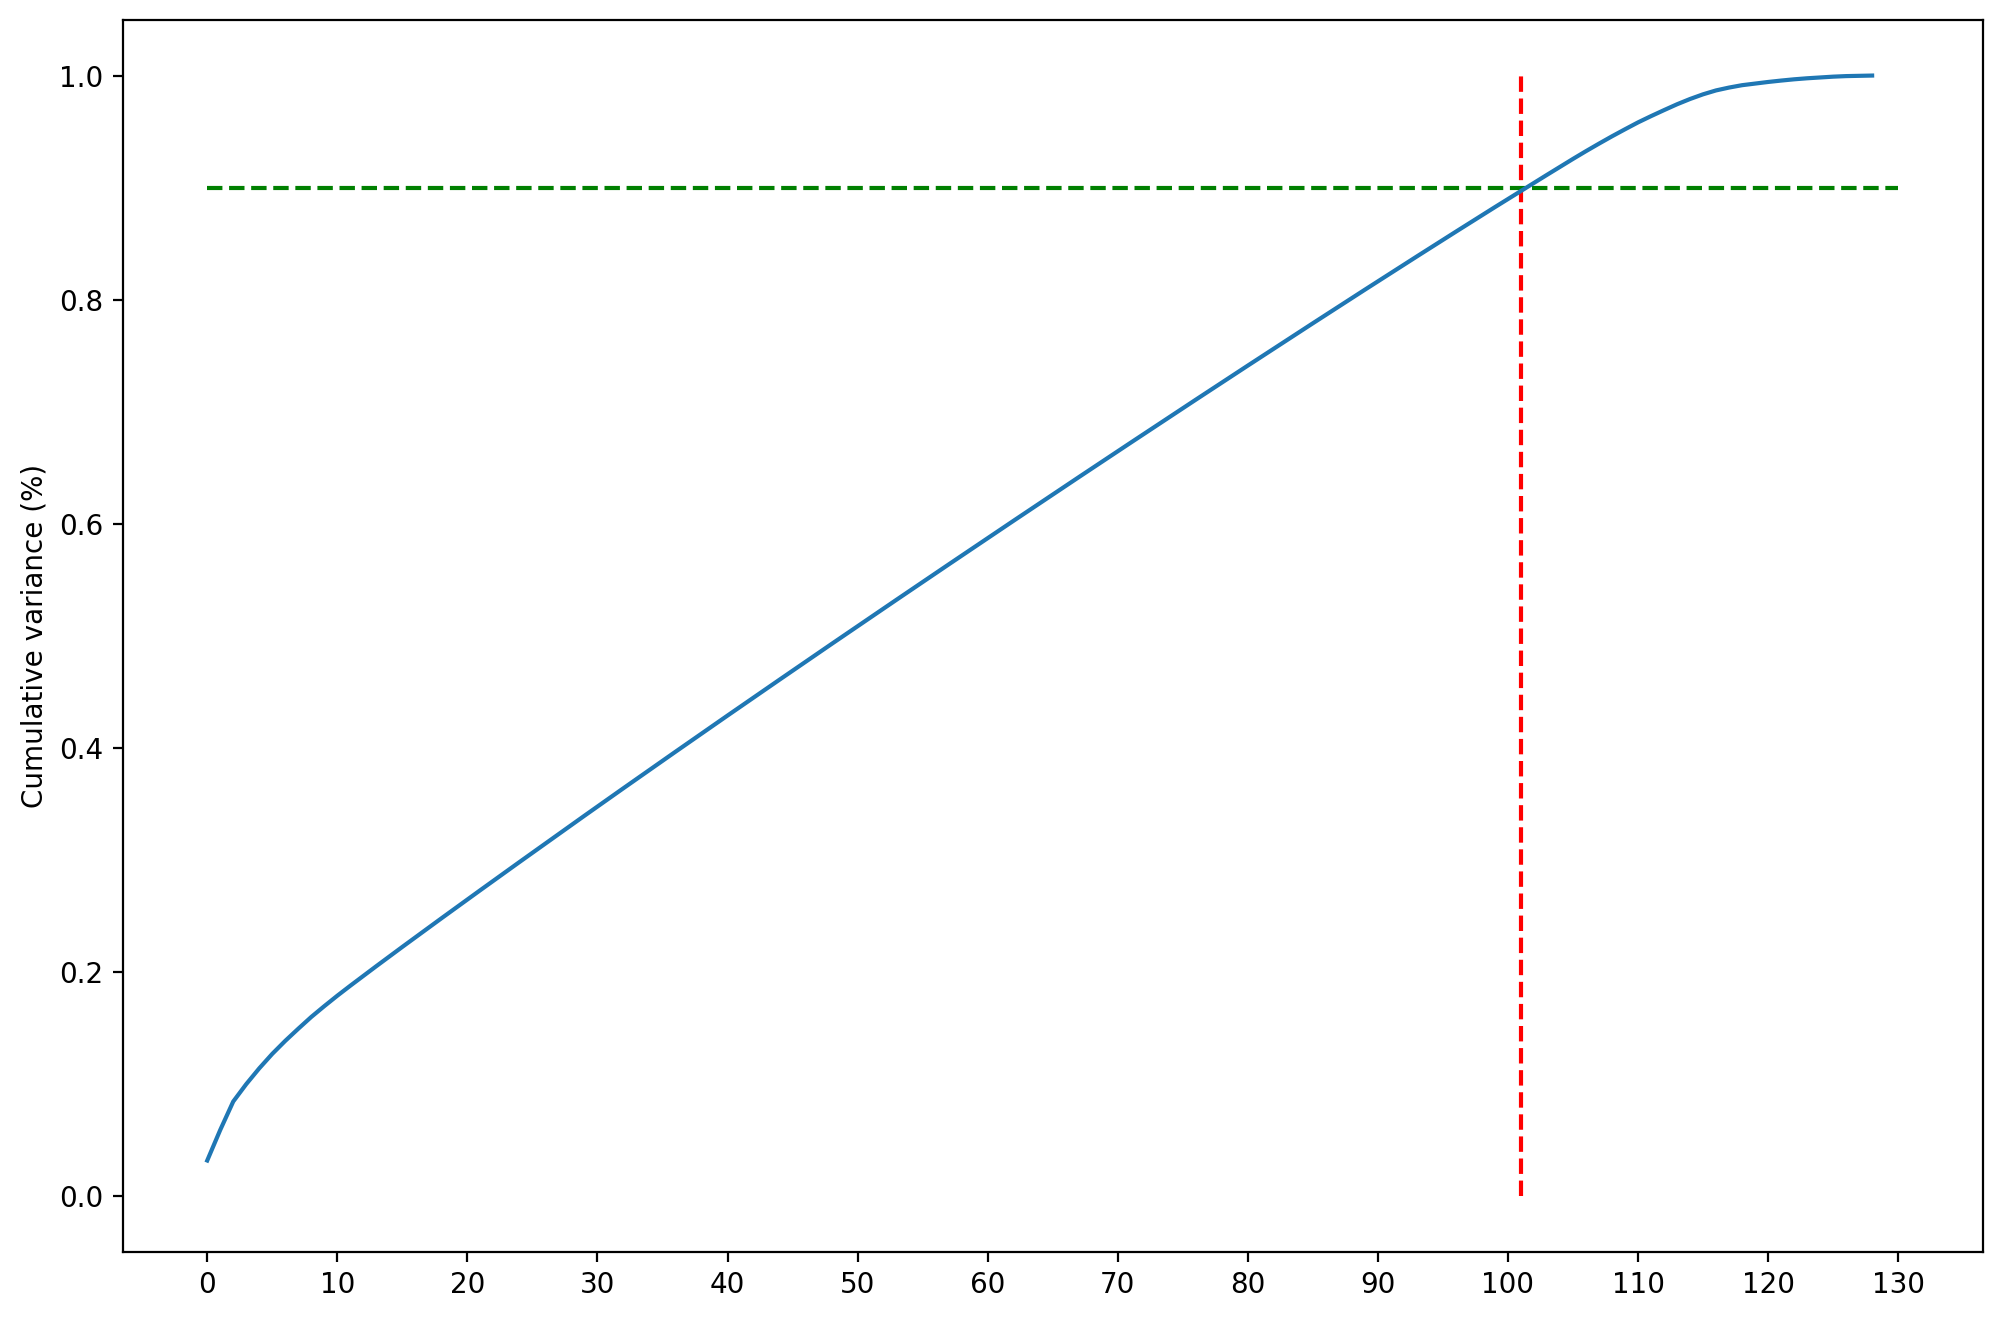

In [60]:
# Plotting the best number of PCA components

fig = plt.figure(figsize=[12,8], dpi=200)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130])
plt.vlines(x=101, ymax=1, ymin=0, colors='r', linestyles='--')
plt.hlines(y=0.90, xmax=130, xmin=0, colors='g', linestyles='--')
plt.plot(var_cumu)
plt.ylabel("Cumulative variance (%)")
plt.show()

In [61]:
# Data compression to 101 variables

pca_final = PCA(n_components=101)
X_pca_final = pca_final.fit_transform(X_scaled_train) 

In [62]:
print(X_pca_final.shape)

(47742, 101)


In [63]:
# Shape of the X_pca_final

corrmat = np.corrcoef(X_pca_final.transpose())
corrmat.shape

(101, 101)

In [64]:
# DataFrame after PCA

pca_df = pd.DataFrame(X_pca_final)
pca_df

0         1         2         3         4         5         6    \
0     -1.684461 -1.450727  1.281118 -0.856288 -1.628848  1.018927  0.144787   
1     -1.059191 -1.256001 -1.518125  0.024637  0.681452 -1.127259 -1.224217   
2      1.271416  1.851010 -3.124229  0.620976  1.232899 -1.397367 -0.661637   
3     -0.202117  1.180128 -3.181648 -0.416899 -0.986565  0.616929 -0.709810   
4      1.632369 -1.784210 -1.478109 -1.807082  1.508414  0.779220  1.698877   
...         ...       ...       ...       ...       ...       ...       ...   
47737  1.093641  1.203493 -0.102365  2.613336  1.730530  0.624069 -0.918941   
47738  2.961028 -1.294713  0.678292  3.611434  0.033643  1.110362  0.685868   
47739  0.524713 -2.874157  0.048188 -0.335424 -1.154264  0.194346 -0.834279   
47740  0.003358  0.793321  1.428744  0.290991  0.229066 -0.836792  0.168401   
47741  3.021786  0.434964 -1.113147 -1.184833  0.270257 -0.097160 -0.320017   

            7         8         9         10        11        12        13   \
0     -1.026945  1.198812 -2.295375 -1.895675  0.885845 -0.215277 -1.848161   
1      0.803086  3.962937  0.718995  0.808969  0.820579 -2.329701  0.013856   
2     -2.930197  1.264464 -0.118362 -0.775165  0.537088  1.428666  2.444171   
3     -0.361067 -0.115002  1.330867  0.747075 -2.729180  1.134592 -1.524292   
4     -2.512111 -1.959308  0.874561 -1.812585  1.183023  1.234564 -0.046516   
...         ...       ...       ...       ...       ...       ...       ...   
47737  0.607923 -0.953217 -0.968399  0.234202 -0.397708 -0.410467  0.299839   
47738  1.412592 -0.728275 -0.733337 -0.360092 -1.121990  0.091465 -0.126414   
47739 -0.350502 -0.658630  0.443276  0.427403  0.192807 -0.260390 -0.261322   
47740  0.673771 -1.426919 -1.064691  0.948038 -0.138925  0.229650 -0.239594   
47741  1.519681 -0.504352  0.411565  0.025291  0.425973  0.627573 -0.711578   

            14        15        16        17        18        19        20   \
0     -1.893026 -0.600958 -0.297313 -1.087999 -0.292698 -1.071813  1.743161   
1      1.622207 -1.084663  0.421871 -1.019274 -1.110622 -2.135495  1.712862   
2      0.334247  0.355877  1.084232 -0.730878  1.450712 -0.845931  0.543370   
3     -0.335294  0.672140  0.952222  2.715698  1.162658 -0.320880  0.583040   
4      0.866342  1.537777 -1.133764  0.937333  1.325105 -1.104778 -1.429308   
...         ...       ...       ...       ...       ...       ...       ...   
47737  0.302824 -0.382164  0.012457 -0.360619 -0.487061 -0.090735  0.331442   
47738  0.184696  0.262450 -0.111160 -0.012657 -0.157081 -0.117210 -0.176568   
47739 -0.175418  0.419222 -0.437691  0.249652  0.046672  0.012268  0.026704   
47740 -0.171553  0.030669 -0.197499  0.077793 -0.213092 -0.139303  0.183119   
47741 -0.321988 -0.110117  0.081783  0.043098  0.537225 -0.018769 -0.188958   

            21        22        23        24        25        26        27   \
0     -0.830754  2.503369 -1.334971 -0.512126 -1.245035 -0.104330 -0.740353   
1     -0.239970  0.438034 -0.551233  0.604098 -2.451751 -1.395331 -1.302104   
2      0.211245 -0.979473 -0.213730  1.136145 -1.628830 -0.518051  1.329991   
3     -1.169811  0.122244 -0.707842  1.034686  0.769990 -1.246054  0.516176   
4      3.456039  0.826424  1.355485 -0.383678  1.872402 -1.566373 -1.437902   
...         ...       ...       ...       ...       ...       ...       ...   
47737 -0.092220  0.213180  0.109743 -0.044518 -0.272147 -0.090801  0.119686   
47738  0.232148 -0.315504 -0.032458  0.222094  0.247229 -0.036065 -0.371789   
47739  0.167405 -0.185788 -0.047891 -0.043489  0.036234  0.052399 -0.100890   
47740 -0.008650  0.228135  0.099340 -0.175166 -0.253259  0.017223  0.110336   
47741  0.017415 -0.245657  0.098593 -0.141845  0.015561  0.013237  0.157044   

            28        29        30        31        32        33        34   \
0      0.520915  0.983303  0.193565  1.467942  0.726115 -1.402521  0.766878   
1      0.789963 -0.967649  0.022145 -1.374879 -0.627856  1

## Training models after PCA

In [65]:
X_pca_train = X_pca_final
X_pca_test = pca_final.transform(X_scaled_test)

print(X_pca_train.shape)
print(X_pca_test.shape)

(47742, 101)
(11936, 101)


### Decision Tree

In [66]:
dtree_pca = DecisionTreeClassifier()
dtree_pca.fit(X_pca_train, y_resampled)

DecisionTreeClassifier()

In [67]:
dtree_pca_pred = dtree_pca.predict(X_pca_test)

In [68]:
print(classification_report(y_test, dtree_pca_pred, zero_division=1))

dtree_pca_pr = evaluate(dtree_pca_pred, y_test)
dtree_pca_pr

              precision    recall  f1-score   support

           0       0.19      0.24      0.21      1691
           1       0.87      0.83      0.85     10245

    accuracy                           0.75     11936
   macro avg       0.53      0.53      0.53     11936
weighted avg       0.77      0.75      0.76     11936



{'f1-score': 0.21, 'accuracy': 0.75}

In [69]:
confusion_matrix(y_test, dtree_pca_pred)

array([[ 402, 1289],
       [1742, 8503]], dtype=int64)

### Random Forest

In [70]:
rf_pca = RandomForestClassifier()
rf_pca.fit(X_pca_train, y_resampled)

RandomForestClassifier()

In [71]:
rf_pca_pred = rf_pca.predict(X_pca_test)

In [72]:
print(classification_report(y_test, rf_pca_pred, zero_division=1))

rf_pca_pr = evaluate(rf_pca_pred, y_test)
rf_pca_pr

              precision    recall  f1-score   support

           0       0.34      0.03      0.06      1691
           1       0.86      0.99      0.92     10245

    accuracy                           0.85     11936
   macro avg       0.60      0.51      0.49     11936
weighted avg       0.79      0.85      0.80     11936



{'f1-score': 0.06, 'accuracy': 0.85}

In [73]:
confusion_matrix(y_test, rf_pca_pred)

array([[   52,  1639],
       [  102, 10143]], dtype=int64)

### Logistic Regression

In [74]:
lr_pca = LogisticRegression()
lr_pca.fit(X_pca_train, y_resampled)

LogisticRegression()

In [75]:
lr_pca_pred = lr_pca.predict(X_pca_test)

In [76]:
print(classification_report(y_test, lr_pca_pred, zero_division=1))

lr_pca_pr = evaluate(lr_pca_pred, y_test)
lr_pca_pr

              precision    recall  f1-score   support

           0       0.24      0.11      0.15      1691
           1       0.86      0.95      0.90     10245

    accuracy                           0.83     11936
   macro avg       0.55      0.53      0.53     11936
weighted avg       0.78      0.83      0.80     11936



{'f1-score': 0.15, 'accuracy': 0.83}

In [77]:
confusion_matrix(y_test, lr_pca_pred)

array([[ 179, 1512],
       [ 559, 9686]], dtype=int64)

### Naïve Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB
nb_pca = GaussianNB()
nb_pca.fit(X_pca_train, y_resampled)

GaussianNB()

In [79]:
nb_pca_pred = nb_pca.predict(X_pca_test)

In [80]:
print(classification_report(y_test, nb_pca_pred, zero_division=1))

nb_pca_pr = evaluate(nb_pca_pred, y_test)
nb_pca_pr

              precision    recall  f1-score   support

           0       0.13      0.24      0.17      1691
           1       0.85      0.73      0.78     10245

    accuracy                           0.66     11936
   macro avg       0.49      0.48      0.48     11936
weighted avg       0.75      0.66      0.70     11936



{'f1-score': 0.17, 'accuracy': 0.66}

In [81]:
confusion_matrix(y_test, nb_pca_pred)

array([[ 405, 1286],
       [2795, 7450]], dtype=int64)

### K-Nearest Neighbors (KNN)

In [82]:
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca_train, y_resampled)

KNeighborsClassifier()

In [83]:
knn_pca_pred = knn_pca.predict(X_pca_test)

In [84]:
print(classification_report(y_test, knn_pca_pred, zero_division=1))

knn_pca_pr = evaluate(knn_pca_pred, y_test)
knn_pca_pr

              precision    recall  f1-score   support

           0       0.24      0.10      0.14      1691
           1       0.86      0.95      0.90     10245

    accuracy                           0.83     11936
   macro avg       0.55      0.52      0.52     11936
weighted avg       0.78      0.83      0.80     11936



{'f1-score': 0.14, 'accuracy': 0.83}

In [85]:
confusion_matrix(y_test, knn_pca_pred)

array([[ 167, 1524],
       [ 520, 9725]], dtype=int64)

### Multi Layer Perceptron Classifier (MLP)

In [86]:
mlp_pca = MLPClassifier(random_state=42)
mlp_pca.fit(X_pca_train, y_resampled)

C:\Users\barte\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [87]:
mlp_pca_pred = mlp_pca.predict(X_pca_test)

In [88]:
print(classification_report(y_test, mlp_pca_pred, zero_division=1))

mlp_pca_pr = evaluate(mlp_pca_pred, y_test)
mlp_pca_pr

              precision    recall  f1-score   support

           0       0.24      0.16      0.20      1691
           1       0.87      0.92      0.89     10245

    accuracy                           0.81     11936
   macro avg       0.56      0.54      0.54     11936
weighted avg       0.78      0.81      0.79     11936



{'f1-score': 0.2, 'accuracy': 0.81}

In [89]:
confusion_matrix(y_test, mlp_pca_pred)

array([[ 279, 1412],
       [ 864, 9381]], dtype=int64)

### Extreme Gradient Boosting Classifier (XGB)

In [90]:
xgb_pca = XGBClassifier(random_state=42)
xgb_pca.fit(X_pca_train, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [91]:
xgb_pca_pred = xgb_pca.predict(X_pca_test)

In [92]:
print(classification_report(y_test, xgb_pca_pred, zero_division=1))

xgb_pca_pr = evaluate(xgb_pca_pred, y_test)
xgb_pca_pr

              precision    recall  f1-score   support

           0       0.29      0.07      0.11      1691
           1       0.86      0.97      0.91     10245

    accuracy                           0.84     11936
   macro avg       0.58      0.52      0.51     11936
weighted avg       0.78      0.84      0.80     11936



{'f1-score': 0.11, 'accuracy': 0.84}

In [93]:
confusion_matrix(y_test, xgb_pca_pred)

array([[ 118, 1573],
       [ 291, 9954]], dtype=int64)

In [94]:
# Data Frame with accuracy and F1 scores of all models used before and after PCA

pca_prediction_data={'Model': ['Decision Tree',
                              'Random Forest',
                              'Logistic Regression',
                              'Naive Bayes',
                              'KNN',
                              'MLP',
                              'XGB'
                               ],
                     
                   'F1-score': [dtree_pr['f1-score'],
                              rf_pr['f1-score'],
                              lr_pr['f1-score'],
                              nb_pr['f1-score'],
                              knn_pr['f1-score'],
                              mlp_pr['f1-score'],
                              xgb_pr['f1-score']
                               ],
                 
                   'Accuracy': [dtree_pr['accuracy'],
                              rf_pr['accuracy'],
                              lr_pr['accuracy'],
                              nb_pr['accuracy'],
                              knn_pr['accuracy'],
                              mlp_pr['accuracy'],
                              xgb_pr['accuracy']
                               ],
                     
         'F1-score after PCA':[dtree_pca_pr['f1-score'],
                              rf_pca_pr['f1-score'],
                              lr_pca_pr['f1-score'],
                              nb_pca_pr['f1-score'],
                              knn_pca_pr['f1-score'],
                              mlp_pca_pr['f1-score'],
                              xgb_pca_pr['f1-score']
                               ],
                               
         'Accuracy after PCA':[dtree_pca_pr['accuracy'],
                              rf_pca_pr['accuracy'],
                              lr_pca_pr['accuracy'],
                              nb_pca_pr['accuracy'],
                              knn_pca_pr['accuracy'],
                              mlp_pca_pr['accuracy'],
                              xgb_pca_pr['accuracy']
                               ],

                    }
 
# Create DataFrame
prediction_table_all = pd.DataFrame(pca_prediction_data)
prediction_table_all.style.hide(axis='index')

None of the models improved both their metrics (f1_score and accuracy) after applying PCA. The Logistic Regression algorithm significantly improved its f1_score and lowered accuracy. The XGB model slightly improved its f1_score and worsened accuracy. After PCA, the Decision Tree has the highest f1_score value, but it has not changed compared to the previous results. The Random Forest and KNN models did not change their results. The accuracy metric has undergone minor fluctuations in some models. The results obtained from the first modeling seem to be better than those obtained after PCA.

## Selecting the final models

Three models with the best F1 scores were selected for further analysis:
* **Decision Tree**
* **Naïve Bayes**
* **Multi Layer Perceptron (MLP)**

The first two models (Decision Tree and Naive Bayes) will be used later before PCA is applied. Then, a number of features will be reduced to the MLP model.

### Decision Tree Classifier

In [95]:
# Feature importances

dtree_importance = dtree.feature_importances_
dtree_importance

array([1.82678748e-02, 2.15060514e-01, 2.39615316e-02, 2.63920850e-02,
       1.44483300e-02, 4.10727618e-02, 2.59242105e-02, 4.91451554e-03,
       2.94135535e-01, 1.77492144e-02, 2.22797680e-03, 3.02721560e-02,
       2.67461916e-02, 1.79685572e-03, 2.79074354e-03, 3.80397441e-02,
       3.48911225e-02, 0.00000000e+00, 4.74427203e-05, 3.94029391e-04,
       1.94400225e-04, 5.62289733e-04, 7.71568938e-04, 6.22351335e-04,
       1.39421285e-03, 1.47110709e-03, 1.29253105e-03, 1.55453719e-03,
       2.42246899e-03, 8.39061673e-04, 1.35293497e-03, 7.68887072e-04,
       9.55855438e-04, 1.56396235e-03, 1.15455790e-03, 1.12082358e-03,
       5.87134059e-04, 4.04802228e-04, 8.43475432e-04, 3.57370383e-04,
       3.56096982e-04, 1.15830691e-04, 3.06618788e-04, 5.58557804e-05,
       7.44743738e-05, 1.22803022e-04, 3.18155364e-04, 7.17612366e-05,
       7.22866616e-05, 6.65340913e-05, 0.00000000e+00, 0.00000000e+00,
       9.18617577e-03, 8.32396208e-05, 5.77511015e-04, 1.42431379e-02,
      

Text(0, 0.5, 'Features')

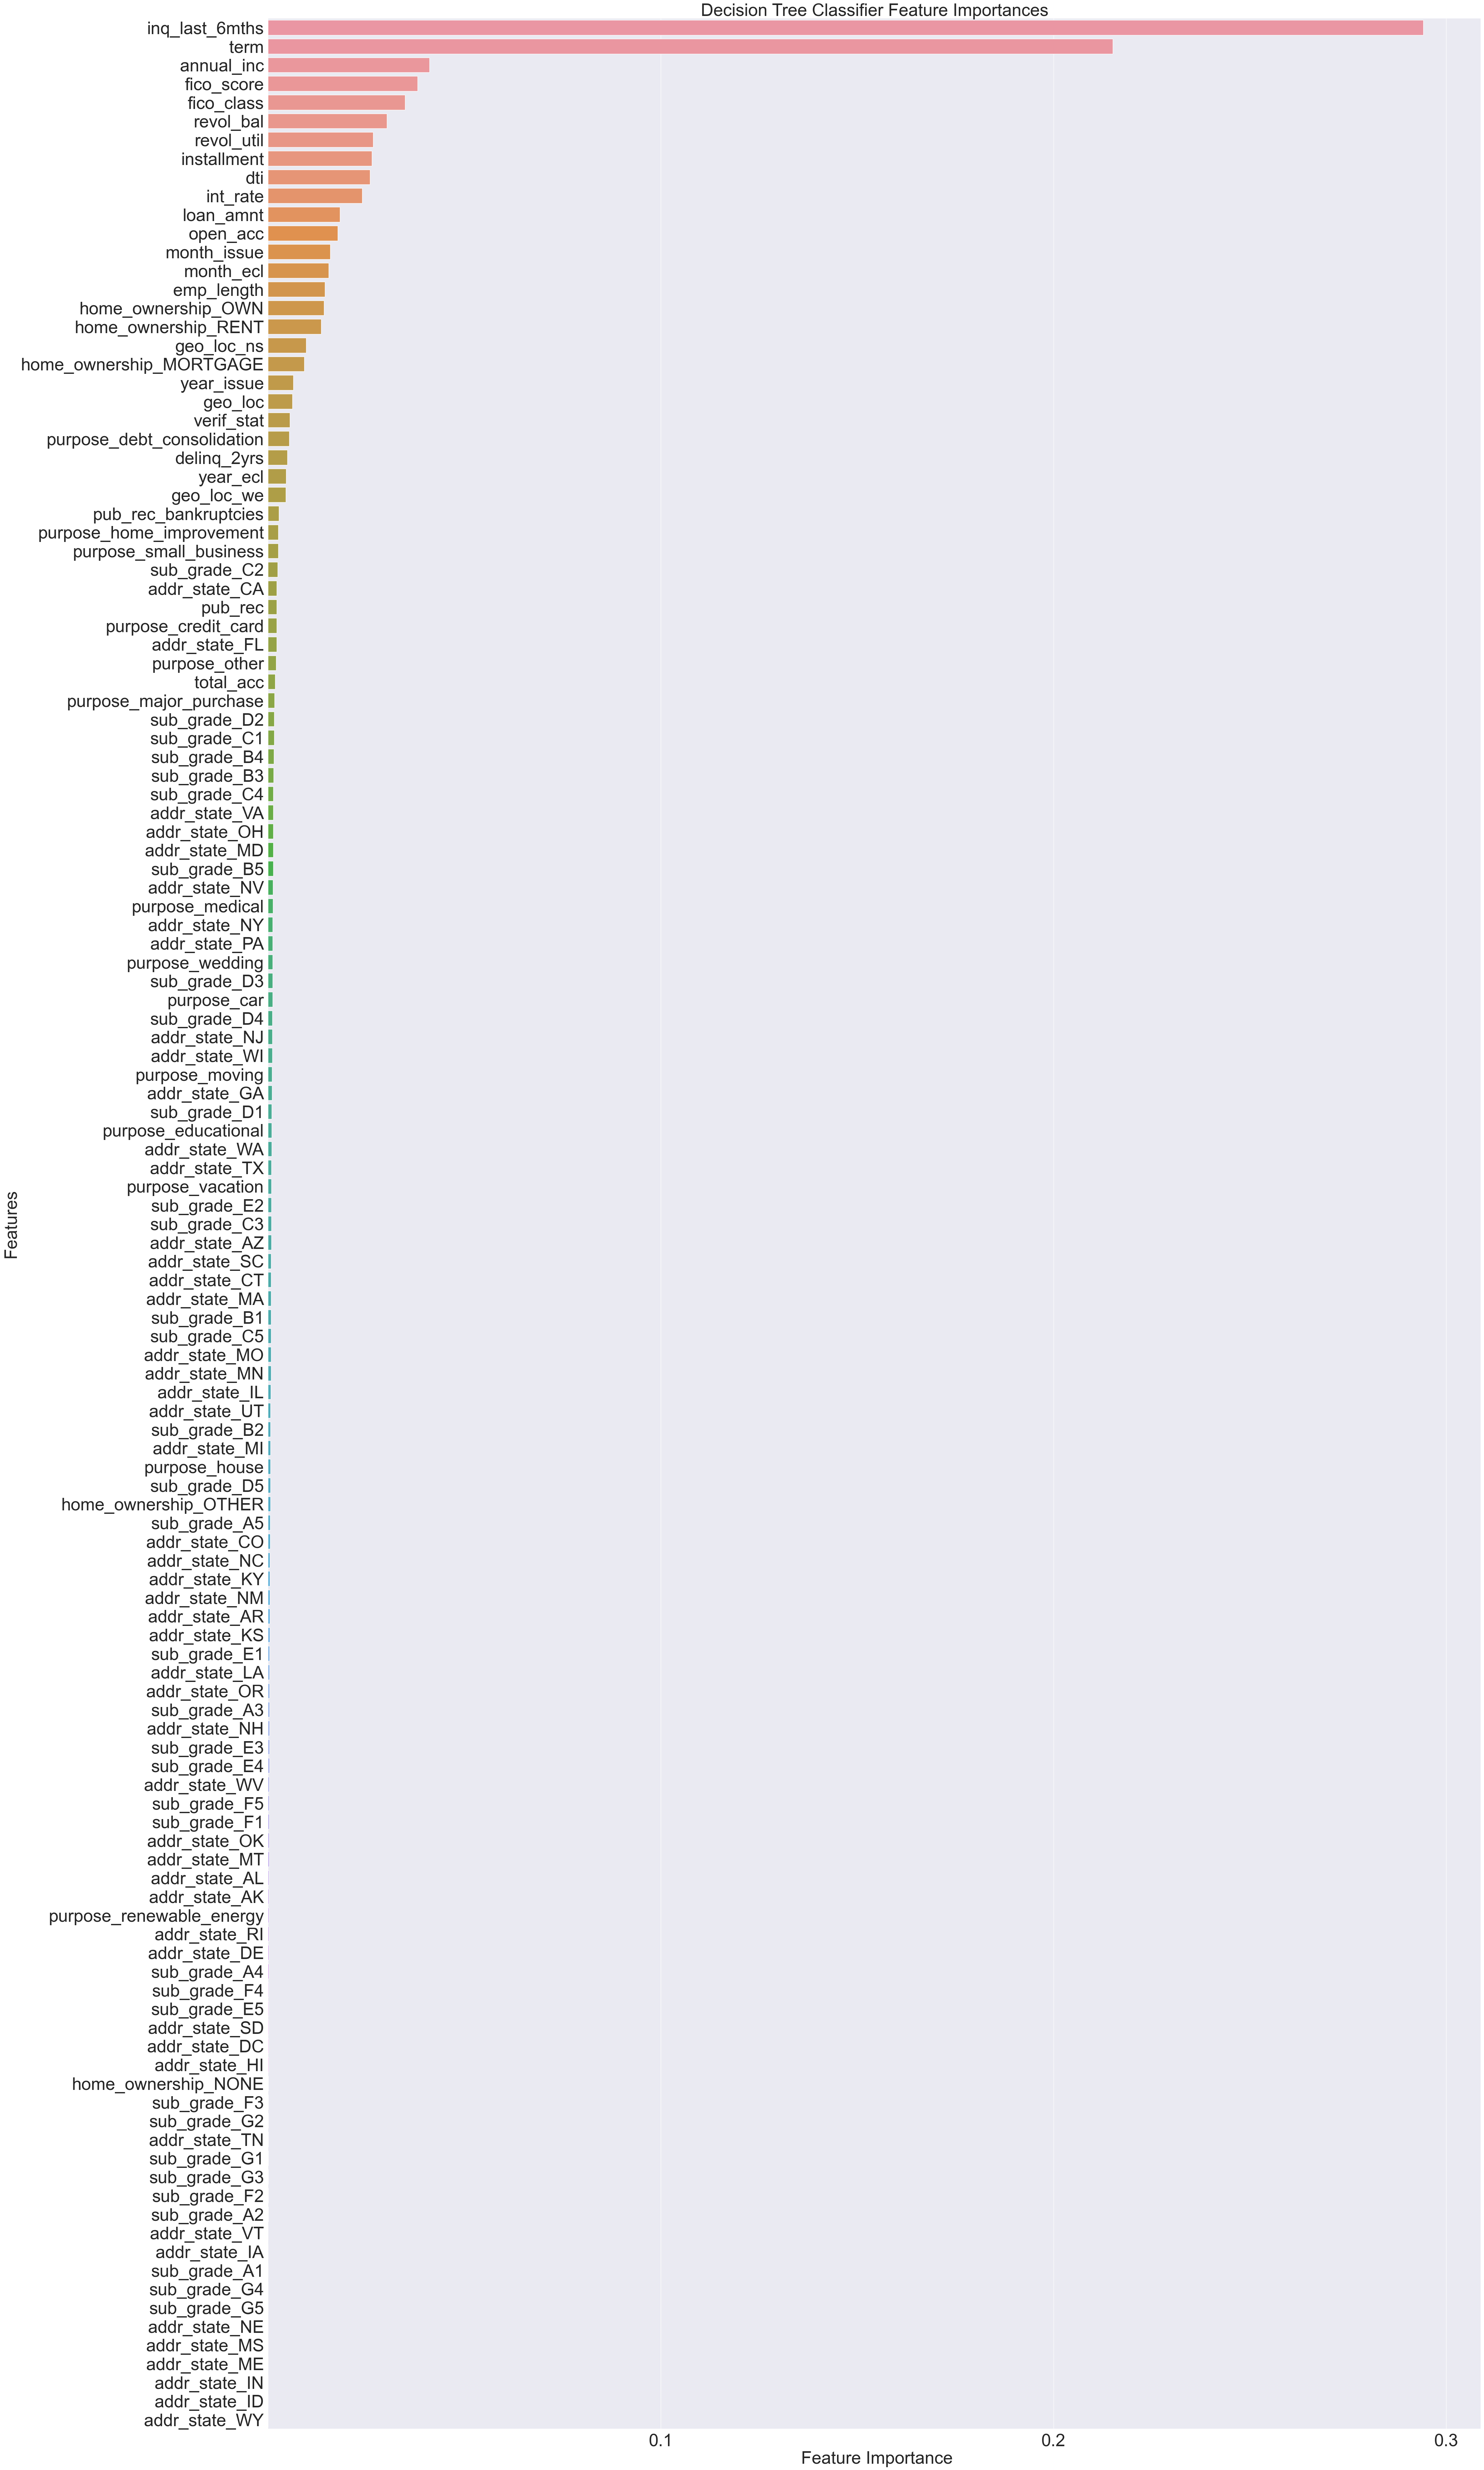

In [96]:
# Decision Tree Classifier Feature Importances Plot

sorted_indices = dtree_importance.argsort()[::-1]
sorted_feature_names = X_train.columns[sorted_indices]
sorted_importances = dtree_importance[sorted_indices]

sns.set(rc={'figure.figsize':(50,100)})
sns.barplot(sorted_importances, sorted_feature_names)
plt.xticks([0.1, 0.2, 0.3], fontsize=40)
plt.yticks(fontsize=40)
plt.title('Decision Tree Classifier Feature Importances', fontsize=40)
plt.xlabel(' Feature Importance', fontsize=40)
plt.ylabel('Features', fontsize=40)

In [97]:
# Cross-Validation using Randomized Search method

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

# Parameters for cross-validation

dtree_params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
                }

# Model CV process 

dtree_cv = RandomizedSearchCV(dtree, dtree_params,
                         n_jobs=-1,
                         verbose=2,
                         scoring=make_scorer(f1_score(y_test, dtree_prediction)),
                         random_state=42)

dtree_cv.fit(X_scaled_train, y_resampled) 

# The best parameter obtained as a result of CV process

print("The best parameters: " + str(dtree_cv.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\barte\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


The best parameters: {'min_samples_leaf': 50, 'max_depth': 5, 'criterion': 'gini'}


In [98]:
# Setting the Final Model with the best parameter

dtree_tuned = dtree_cv.best_estimator_

# Fitting Final Model
dtree_tuned.fit(X_scaled_train, y_resampled)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50)

In [99]:
# Prediction after cross-validation

dtree_cv_prediction = dtree_tuned.predict(X_scaled_test)

In [100]:
# Classification report

print(classification_report(y_test, dtree_cv_prediction))

dtree_cv_pr = evaluate(dtree_cv_prediction, y_test)
dtree_cv_pr

              precision    recall  f1-score   support

           0       0.26      0.30      0.28      1691
           1       0.88      0.86      0.87     10245

    accuracy                           0.78     11936
   macro avg       0.57      0.58      0.57     11936
weighted avg       0.79      0.78      0.79     11936



{'f1-score': 0.28, 'accuracy': 0.78}

In [101]:
# Confusion matrix

confusion_matrix(y_test, dtree_cv_prediction)

array([[ 499, 1192],
       [1403, 8842]], dtype=int64)

In [102]:
# Determining the probability using the predict_proba method

y_proba_dtree = dtree_tuned.predict_proba(X_scaled_test)[:,1]
y_proba_dtree

array([0.66142904, 0.7034749 , 0.56966292, ..., 0.96518836, 0.66142904,
       0.74231332])

Random prediction: ROC AUC=0.579
Decision Tree Classifier model: ROC AUC=0.636


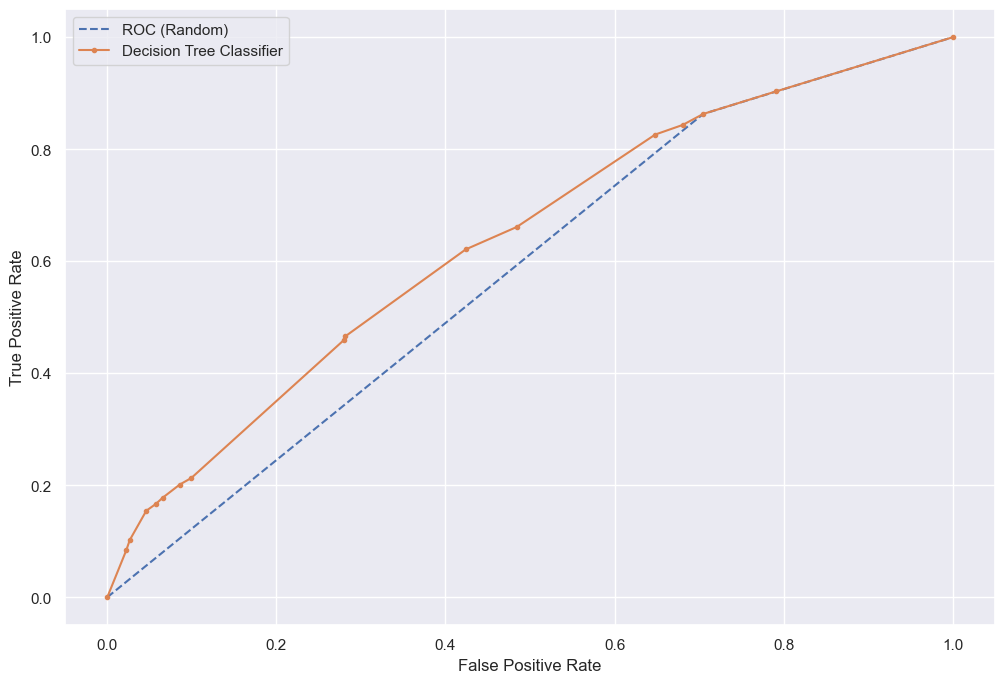

In [103]:
# Ploting the roc_curve and calculating the roc_auc_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rp_auc_dtree = roc_auc_score(y_test, dtree_cv_prediction)
rf_auc_dtree = roc_auc_score(y_test, y_proba_dtree)

# Summarizing scores

print('Random prediction: ROC AUC=%.3f' % (rp_auc_dtree))
print('Decision Tree Classifier model: ROC AUC=%.3f' % (rf_auc_dtree))

# Calculating roc curves

rp_fpr_dtree, rp_tpr_dtree, _ = roc_curve(y_test, dtree_cv_prediction)
rf_fpr_dtree, rf_tpr_dtree, _ = roc_curve(y_test, y_proba_dtree)

# Ploting the roc curve for the model

plt.figure(figsize=(12,8))
plt.plot(rp_fpr_dtree, rp_tpr_dtree, linestyle='--', label='ROC (Random)')
plt.plot(rf_fpr_dtree, rf_tpr_dtree, marker='.', label='Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [104]:
# Results summary

print('Well-predicted values in testing:', (y_test == dtree_cv_prediction).sum())
print('All values in testing part:', y_test.shape[0])
print()
print('Accuracy:', dtree_tuned.score(X_scaled_test, y_test).round(4))
print('F1 score:', f1_score(y_test, dtree_cv_prediction, pos_label=0).round(4))
print('ROC AUC: %.4f' % (rf_auc_dtree))

Well-predicted values in testing: 9341
All values in testing part: 11936

Accuracy: 0.7826
F1 score: 0.2778
ROC AUC: 0.6358


### Naïve Bayes Classifier

In [105]:
# Cross-Validation using Randomized Search method

# Parameters for cross-validation

nb_params = {
    'var_smoothing': np.logspace(0,-9, num=100)
            }

# Model CV process 

nb_cv = RandomizedSearchCV(nb, nb_params,
                         n_jobs=-1, # Number of jobs to be run in parallel (-1: means to use all processors)
                         verbose=2,
                         scoring=make_scorer(f1_score(y_test, nb_prediction)),
                         random_state=42) # Controls the level of detail: higher means more messages gets value as integer.

nb_cv.fit(X_scaled_train, y_resampled) 

# The best parameter obtained as a result of CV process

print("The best parameters: " + str(nb_cv.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\barte\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


The best parameters: {'var_smoothing': 2.848035868435799e-08}


In [106]:
# Setting the Final Model with the best parameter

nb_tuned = nb_cv.best_estimator_

# Fitting Final Model

nb_tuned.fit(X_scaled_train, y_resampled)

GaussianNB(var_smoothing=2.848035868435799e-08)

In [107]:
# Prediction

nb_cv_prediction = nb_tuned.predict(X_scaled_test)

In [108]:
# Classification report

print(classification_report(y_test, nb_cv_prediction))

nb_cv_pr = evaluate(nb_cv_prediction, y_test)
nb_cv_pr

              precision    recall  f1-score   support

           0       0.17      0.44      0.24      1691
           1       0.87      0.64      0.74     10245

    accuracy                           0.61     11936
   macro avg       0.52      0.54      0.49     11936
weighted avg       0.77      0.61      0.67     11936



{'f1-score': 0.24, 'accuracy': 0.61}

In [109]:
# Confusion matrix

confusion_matrix(y_test, nb_cv_prediction)

array([[ 741,  950],
       [3737, 6508]], dtype=int64)

In [110]:
# Determining the probability using the predict_proba method

y_proba_nb = nb_tuned.predict_proba(X_scaled_test)[:,1]
y_proba_nb

array([1.00000000e+00, 9.99952989e-01, 1.00000000e+00, ...,
       1.00000000e+00, 6.54563108e-22, 1.00000000e+00])

Random prediction: ROC AUC=0.537
Naive Bayes model: ROC AUC=0.551


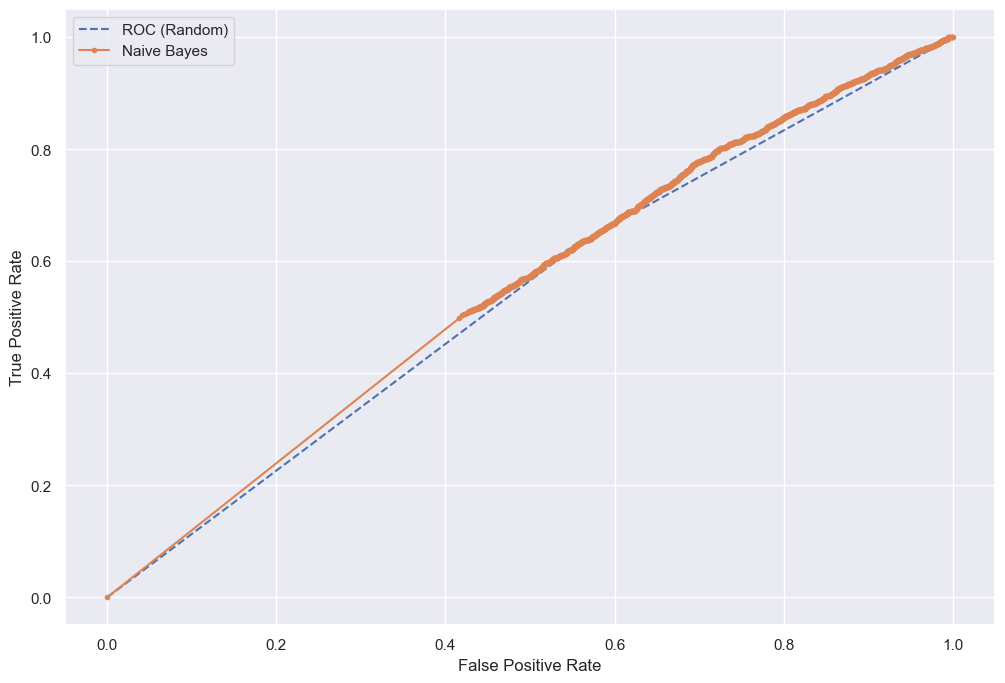

In [111]:
# Ploting the roc_curve and calculating the roc_auc_score

rp_auc_nb = roc_auc_score(y_test, nb_cv_prediction)
rf_auc_nb = roc_auc_score(y_test, y_proba_nb)

# Summarizing scores

print('Random prediction: ROC AUC=%.3f' % (rp_auc_nb))
print('Naive Bayes model: ROC AUC=%.3f' % (rf_auc_nb))

# Calculating roc curves

rp_fpr_nb, rp_tpr_nb, _ = roc_curve(y_test, nb_cv_prediction)
rf_fpr_nb, rf_tpr_nb, _ = roc_curve(y_test, y_proba_nb)

# Ploting the roc curve for the model

plt.figure(figsize=(12,8))
plt.plot(rp_fpr_nb, rp_tpr_nb, linestyle='--', label='ROC (Random)')
plt.plot(rf_fpr_nb, rf_tpr_nb, marker='.', label='Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [112]:
# Results summary

print('Well-predicted values in testing:', (y_test == nb_cv_prediction).sum())
print('All values in testing part:', y_test.shape[0])
print()
print('Accuracy:', nb_tuned.score(X_scaled_test, y_test).round(4))
print('F1 score:', f1_score(y_test, nb_cv_prediction, pos_label=0).round(4))
print('ROC AUC: %.4f' % (rf_auc_nb))

Well-predicted values in testing: 7249
All values in testing part: 11936

Accuracy: 0.6073
F1 score: 0.2402
ROC AUC: 0.5508


### Multi Layer Perceptron Classifier (MLP)

C:\Users\barte\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


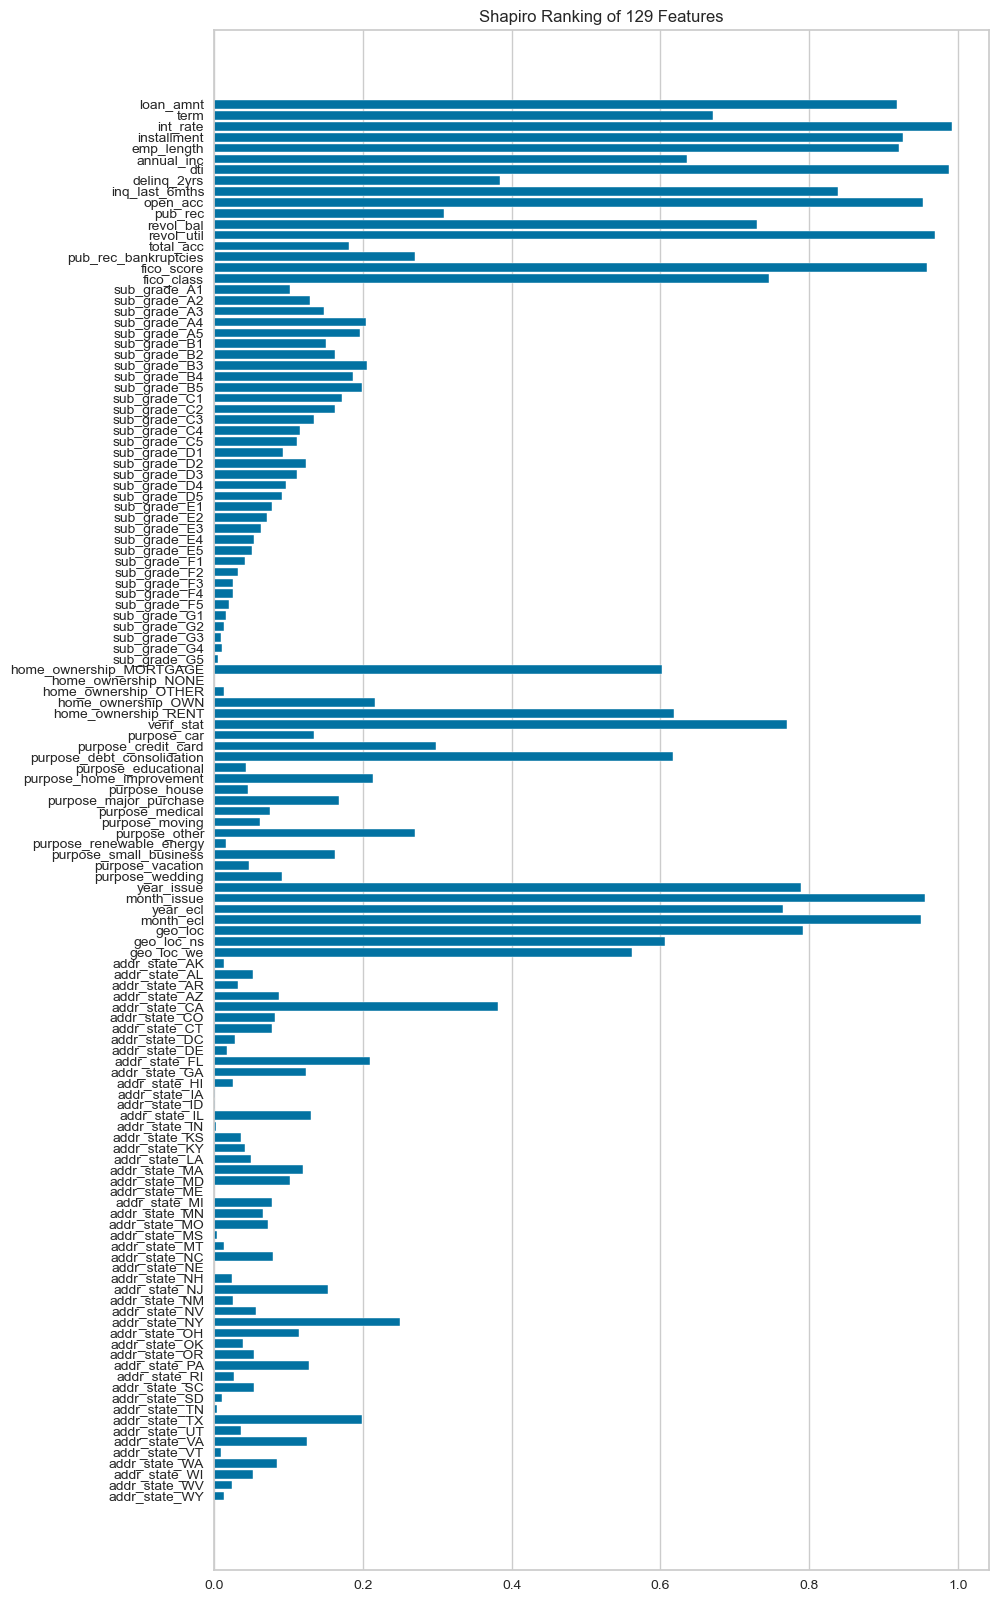

<AxesSubplot:title={'center':'Shapiro Ranking of 129 Features'}>

In [113]:
# Importing yellowbrick for feature importances

from yellowbrick.features import Rank1D, RadViz

visualizer = RadViz(size=(1000, 2000))
visualizer = Rank1D(features=X_train.columns, algorithm='shapiro')
visualizer.fit(X_scaled_train, y_resampled) # Fit the data to the visualizer
visualizer.transform(X_scaled_train)
visualizer.show()

In [114]:
# Features with more than 0.6 iportance for MLP Calssifier (choosing arbitraly)

new_X = df[['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
'pub_rec', 'revol_bal', 'revol_util', 'fico_score', 'fico_class', 'home_ownership_MORTGAGE', 'home_ownership_RENT', 'verif_stat',
'purpose_debt_consolidation', 'year_issue', 'month_issue', 'year_ecl', 'month_ecl', 'geo_loc', 'geo_loc_ns']]

In [115]:
new_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39786 non-null  float64
 1   term                        39786 non-null  int64  
 2   int_rate                    39786 non-null  float64
 3   installment                 39786 non-null  float64
 4   emp_length                  39786 non-null  float64
 5   annual_inc                  39786 non-null  float64
 6   dti                         39786 non-null  float64
 7   delinq_2yrs                 39786 non-null  float64
 8   inq_last_6mths              39786 non-null  float64
 9   open_acc                    39786 non-null  float64
 10  pub_rec                     39786 non-null  float64
 11  revol_bal                   39786 non-null  float64
 12  revol_util                  39786 non-null  float64
 13  fico_score                  397

It was limited to using only the 25 most important features (>=0.6 for feature importances) because the neural network model (MLP) is computationally demanding. This would significantly extend the entire cross-validation process for all functions (130).

In [116]:
new_X.to_csv('Part_4.csv', index=False)

In [117]:
# New data split

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(new_X, y, test_size=0.3, random_state=42)

In [118]:
# Data balance using SMOTE

X_new_train, y_new_train = smote.fit_resample(X_new_train, y_new_train)

In [119]:
# Data standardization

scaler.fit(X_new_train)
X_new_train_scaled = scaler.transform(X_new_train)
X_new_test_scaled = scaler.transform(X_new_test)

In [120]:
# New model

mlp_final = MLPClassifier(random_state=42)
mlp_final.fit(X_new_train_scaled, y_new_train)

MLPClassifier(random_state=42)

In [121]:
# Prediction

mlp_final_prediction = mlp_final.predict(X_new_test_scaled)

In [122]:
# Classification report

print(classification_report(y_new_test, mlp_final_prediction))

mlp_final_pr = evaluate(mlp_final_prediction, y_new_test)
mlp_final_pr

              precision    recall  f1-score   support

           0       0.22      0.21      0.22      1691
           1       0.87      0.88      0.87     10245

    accuracy                           0.78     11936
   macro avg       0.55      0.54      0.55     11936
weighted avg       0.78      0.78      0.78     11936



{'f1-score': 0.22, 'accuracy': 0.78}

In [123]:
# Confusion matrix

confusion_matrix(y_new_test, mlp_final_prediction)

array([[ 362, 1329],
       [1276, 8969]], dtype=int64)

In [124]:
# Cross-Validation using Randomized Search method

# Parameters for cross-validation

mlp_params = {"alpha": [0.1, 0.01, 0.0001],
              "hidden_layer_sizes": [(10, 10, 10),
                                     (100, 100, 100),
                                     (100, 100)],
              "solver" : ["lbfgs" ,"adam" ,"sgd"],
              "activation": ["relu", "logistic"]}

# Model CV process 

mlp_final_cv = RandomizedSearchCV(mlp_final, mlp_params,
                         n_jobs=-1, # Number of jobs to be run in parallel (-1: means to use all processors)
                         verbose=2,
                         scoring=make_scorer(f1_score(y_test, dtree_cv_prediction)),
                         random_state=42) # Controls the level of detail: higher means more messages gets value as integer.

mlp_final_cv.fit(X_new_train_scaled, y_new_train) 


# The best parameter obtained as a result of CV process

print("The best parameters: " + str(mlp_final_cv.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\barte\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


The best parameters: {'solver': 'adam', 'hidden_layer_sizes': (10, 10, 10), 'alpha': 0.0001, 'activation': 'relu'}


In [125]:
# Setting the Final Model with the best parameter

mlp_final_tuned = mlp_final_cv.best_estimator_

# Fitting Final Model

mlp_final_tuned.fit(X_new_train_scaled, y_new_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), random_state=42)

In [126]:
# Prediction

mlp_cv_prediction = mlp_final_tuned.predict(X_new_test_scaled)

In [127]:
# Classification report

print(classification_report(y_new_test, mlp_cv_prediction))

mlp_final_pr = evaluate(mlp_cv_prediction, y_new_test)
mlp_final_pr

              precision    recall  f1-score   support

           0       0.21      0.14      0.16      1691
           1       0.86      0.91      0.89     10245

    accuracy                           0.80     11936
   macro avg       0.54      0.52      0.53     11936
weighted avg       0.77      0.80      0.79     11936



{'f1-score': 0.16, 'accuracy': 0.8}

In [128]:
# Confusion matrix

confusion_matrix(mlp_cv_prediction, y_new_test)

array([[ 230,  884],
       [1461, 9361]], dtype=int64)

In [129]:
# Determining the probability using the predict_proba method

y_proba_mlp = mlp_final_tuned.predict_proba(X_new_test_scaled)[:,1]
y_proba_mlp

array([0.95811625, 0.71585661, 0.7072938 , ..., 0.95551697, 0.71725984,
       0.50722825])

Random prediction: ROC AUC=0.525
MLP Classifier model: ROC AUC=0.638


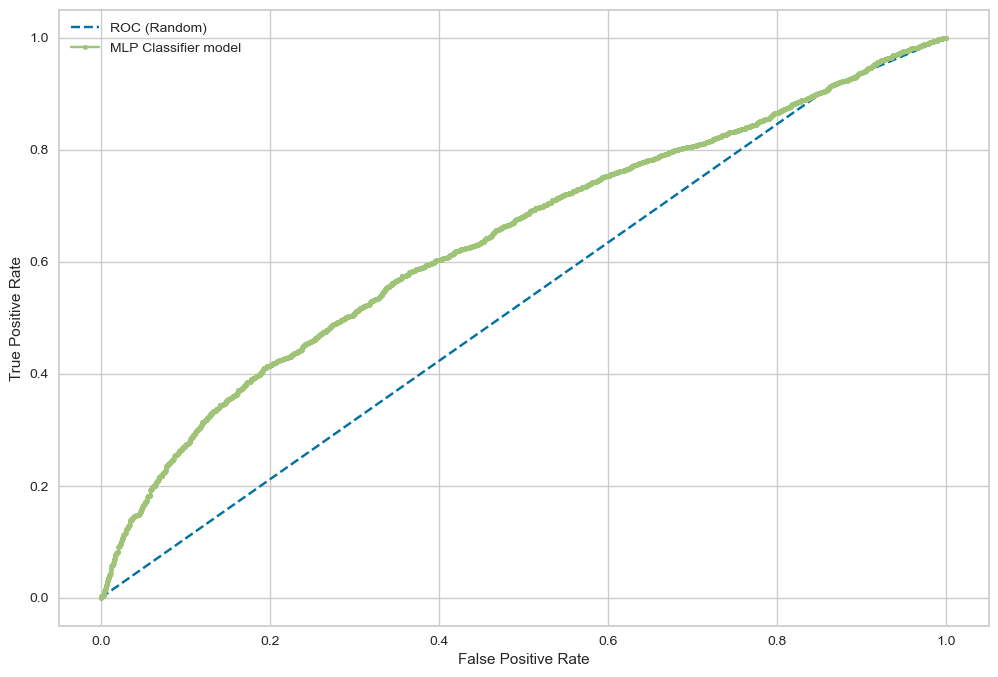

In [130]:
# Ploting the roc_curve and calculating the roc_auc_score

rp_auc_mlp = roc_auc_score(y_new_test, mlp_cv_prediction)
rf_auc_mlp = roc_auc_score(y_new_test, y_proba_mlp)

# Summarizing scores

print('Random prediction: ROC AUC=%.3f' % (rp_auc_mlp))
print('MLP Classifier model: ROC AUC=%.3f' % (rf_auc_mlp))

# Calculating roc curves

rp_fpr_mlp, rp_tpr_mlp, _ = roc_curve(y_new_test, mlp_cv_prediction)
rf_fpr_mlp, rf_tpr_mlp, _ = roc_curve(y_new_test, y_proba_mlp)

# Ploting the roc curve for the model

plt.figure(figsize=(12,8))
plt.plot(rp_fpr_mlp, rp_tpr_mlp, linestyle='--', label='ROC (Random)')
plt.plot(rf_fpr_mlp, rf_tpr_mlp, marker='.', label='MLP Classifier model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [131]:
# Results summary

print('Well-predicted values in testing:', (y_new_test == mlp_cv_prediction).sum())
print('All values in testing part:', y_new_test.shape[0])
print()
print('Accuracy:', mlp_final_tuned.score(X_new_test_scaled, y_new_test).round(4))
print('F1 score:', f1_score(y_new_test, mlp_cv_prediction, pos_label=0).round(4))
print('ROC AUC: %.4f' % (rf_auc_mlp))

Well-predicted values in testing: 9591
All values in testing part: 11936

Accuracy: 0.8035
F1 score: 0.164
ROC AUC: 0.6377


In [132]:
final_scores = pd.DataFrame({'Model': ['Decision Tree',
                                      'Naive Bayes',
                                      'MLP'
                                      ],
                             
                          'F1 score': [dtree_cv_pr['f1-score'],
                                      nb_cv_pr['f1-score'],
                                      mlp_final_pr['f1-score']
                                      ],
                          
                          'Accuracy': [dtree_cv_pr['accuracy'],
                                      nb_cv_pr['accuracy'],
                                      mlp_final_pr['accuracy']
                                      ],
                             
                           'ROC AUC': [rf_auc_dtree,
                                      rf_auc_nb,
                                      rf_auc_mlp
                                      ]
    
                            })

# Create DataFrame
final_scores_table = pd.DataFrame(final_scores)
final_scores_table.style.hide(axis='index')

# Conclusion

The project, which focuses on predicting whether Lending Club clients will repay their loans, has been divided into four main components: **Data Processing**, **Exploratory Data Analysis**, **Feature Engineering**, and **Modeling**. After extensive data cleaning and the introduction of new features, the machine learning classification models were implemented. Seven different models were tested: 
* **Decision Tree**, 
* **Random Forest**, 
* **Logistic Regression**, 
* **Naive Bayes**, 
* **K-Nearest Neighbors (KNN)**, 
* **Multi Layer Perceptron (MLP)**,
* **Extreme Gradient Boosting (XGB)**.

It was quickly noticed that the good accuracy of some models was influenced by the imbalanced data, with a significant majority of repaid loans (*Fully paid*) compared to unpaid ones (*Charged off*). To address this imbalance, the SMOTE method was applied. The primary focus was on identifying borrowers who do not fulfill their obligations. Consequently, three models were selected that achieved the highest F1 score for this group of borrowers: **Random Forest**, **Naive Bayes**, and **Multi Layer Perceptron (neural network)**.

Considering all the results obtained through cross-validation, it can be concluded that the **Decision Tree model performed the best**. This is noteworthy because this model is often considered prone to overfitting. The Decision Tree Classifier model achieved the highest **F1 score of 0.28** (for *loan_status* = 0), along with a good **Accuracy of 0.78** and an **ROC AUC score of 0.6358**. The Naive Bayes model achieved a slightly lower F1 score and significantly lower accuracy. The neural network-based algorithm (MLP) had the highest overall accuracy but the lowest F1 score.

*The presented work is the first project of a beginner Data Scientist carried out as part of the Data Science Bootcamp.*